## Загрузим нужные библиотеки

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn import preprocessing

%matplotlib inline

In [119]:
import numpy as np

In [120]:
df = pd.read_csv("train_dataset_train.csv")

/tmp/ipykernel_7612/1091673467.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_dataset_train.csv")


## Рассмотрим датасет по ближе

In [121]:
df.head(3)

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0


In [122]:
len(df)

6000000

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          object 
 2   index_oper                     object 
 3   type                           object 
 4   priority                       float64
 5   is_privatecategory             object 
 6   class                          float64
 7   is_in_yandex                   object 
 8   is_return                      object 
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  name_mfi                       object 
 17  weight_mfi                     float64
 18  pr

In [124]:
df.isnull().any()

id                               False
oper_type + oper_attr            False
index_oper                       False
type                             False
priority                         False
is_privatecategory               False
class                            False
is_in_yandex                     False
is_return                        False
weight                           False
mailtype                         False
mailctg                          False
mailrank                         False
directctg                        False
transport_pay                    False
postmark                         False
name_mfi                         False
weight_mfi                       False
price_mfi                        False
dist_qty_oper_login_1            False
total_qty_oper_login_1           False
total_qty_oper_login_0           False
total_qty_over_index_and_type    False
total_qty_over_index             False
is_wrong_sndr_name               False
is_wrong_rcpn_name       

In [125]:
cols_numeric = []

for y in df.columns:
    if(df[y].dtype == np.float64 or df[y].dtype == np.int64) and y not in ['id', 'label']:
        print(y)
        data = df[y]
        threshold = 3
        mean = np.mean(data)
        std = np.std(data)
        
        outlier = []
        outlier_idx = []
        inlier = []
        print(mean, std)
        if std != 0:
            for idx, i in enumerate(data):
                z = (i-mean)/std
                if z > threshold:
                    outlier.append(i)
                    outlier_idx.append(idx)
                else:
                    inlier.append(i)

            col = df[y].to_numpy()
            col[outlier_idx] = np.median(inlier)
            df[y] = col

priority
7499.8242746666665 175.1916670851593
class
0.35719233333333333 0.9861571732029452
weight
239.99364683333334 450.40014136414067
mailtype
4.995037 0.1562659121448847
mailctg
0.7726733333333333 0.44075721203065404
mailrank
0.0 0.0
directctg
1.9883881666666667 0.10737162253311823
transport_pay
11.876612275001149 22.247936039450597
postmark
0.090698 7.296575900835075
weight_mfi
123.65528183333333 208.4230027404516
price_mfi
456.0945126666667 2103.2905558280904
dist_qty_oper_login_1
319.06891533333334 401.24935934557686
total_qty_oper_login_1
27750951.1819545 29036542.693652563
total_qty_oper_login_0
28988865.260902 53342611.19885118
total_qty_over_index_and_type
56739816.4428565 72903873.76929314
total_qty_over_index
71786861.03414133 75092691.47217274
is_wrong_sndr_name
0.002564166666666667 0.05057263801401064
is_wrong_rcpn_name
0.2597736666666667 0.43851032913847526
is_wrong_phone_number
0.170971 0.37648362137820734
is_wrong_address
0.0012628333333333333 0.035513921007198315


In [126]:
df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964.0,Цех,7503.0,N,0.0,Y,N,416.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819.0,Участок,7503.0,N,0.0,Y,N,795.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,1022_-1,102976.0,ММПО,7503.0,N,0.0,N,N,25.0,...,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0
5999996,2234489,1022_-1,241963.0,Цех,7503.0,N,0.0,Y,N,83.0,...,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0
5999997,4304572,1041_-1,102971.0,Цех,7506.0,N,0.0,N,N,103.0,...,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0
5999998,6550634,1018_-1,102152.0,Цех,7506.0,N,0.0,N,N,269.0,...,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0


In [127]:
np.shape(np.unique(df['is_privatecategory']))

(3,)

In [128]:
le = preprocessing.LabelEncoder()
le.fit(np.unique(df['name_mfi']))
df['name_mfi'] = le.transform(df['name_mfi'].to_numpy())
le = preprocessing.LabelEncoder()
le.fit(np.unique(df['is_privatecategory']))
df['is_privatecategory'] = le.transform(df['is_privatecategory'].to_numpy())
le = preprocessing.LabelEncoder()
le.fit(np.unique(df['oper_type + oper_attr']))
df['oper_type + oper_attr'] = le.transform(df['oper_type + oper_attr'].to_numpy())

In [129]:
df["label"].value_counts()

0    5829020
1     170980
Name: label, dtype: int64

Рассмотрим часть столбцов типа "object"

In [130]:
df["is_in_yandex"].value_counts()

N    3585956
Y    2411374
0       2670
Name: is_in_yandex, dtype: int64

In [131]:
df["is_return"].value_counts()

N    5993017
Y       6983
Name: is_return, dtype: int64

Эти категории можно сделать ранговыми 

In [132]:
df["is_in_yandex"] = pd.Categorical(df["is_in_yandex"])
df["is_in_yandex"].astype('category').cat.codes
df["is_in_yandex"] = df["is_in_yandex"].cat.codes

In [133]:
df["is_return"] = pd.Categorical(df["is_return"])
df["is_return"].astype('category').cat.codes
df["is_return"] = df["is_return"].cat.codes

Посмотрим на некоторые столбцы

<AxesSubplot:xlabel='class', ylabel='count'>

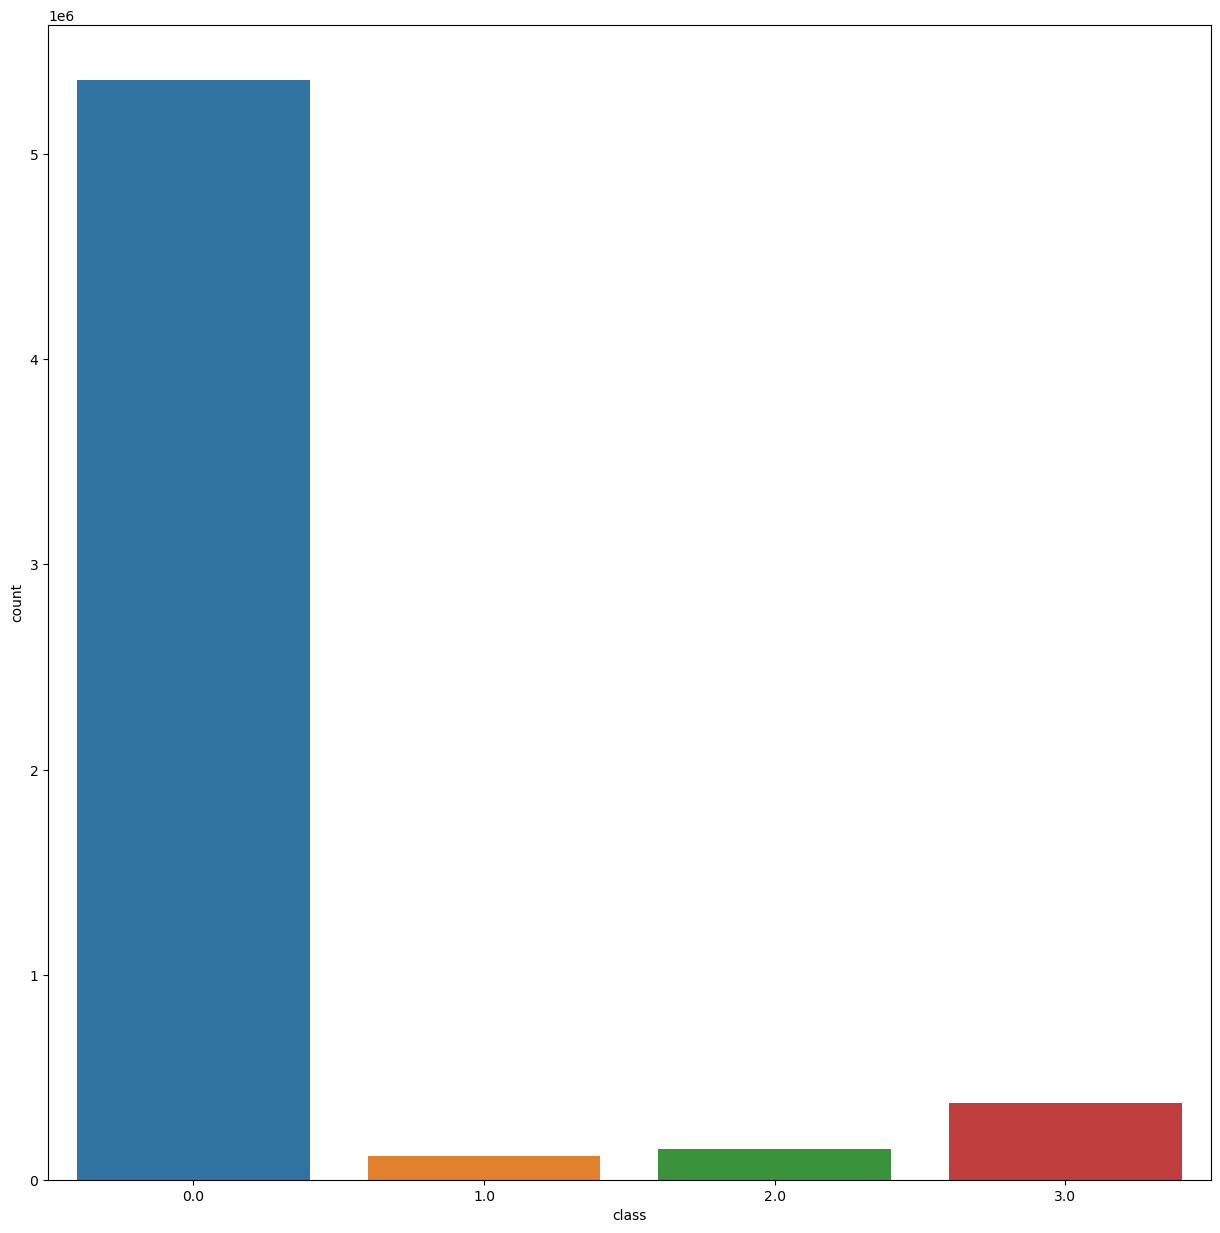

In [134]:
sns.countplot(x = "class" , data  = df)

<AxesSubplot:xlabel='weight', ylabel='count'>

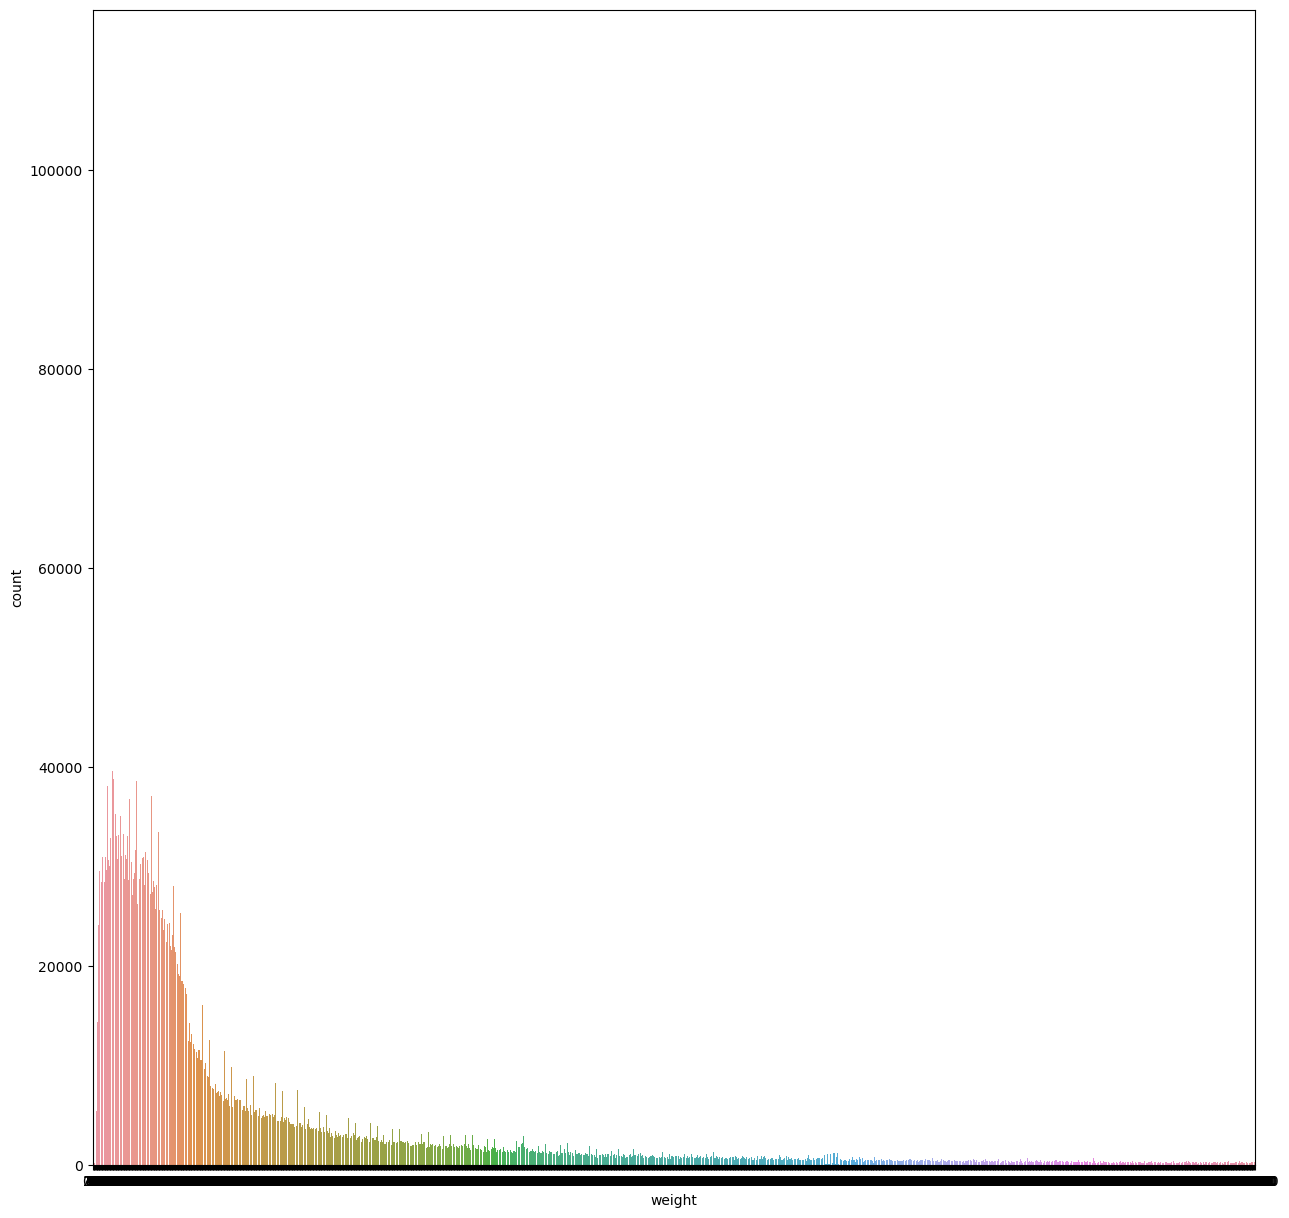

In [135]:
sns.countplot(x = "weight" , data  = df)

Псотроим матрицу корреляции значений

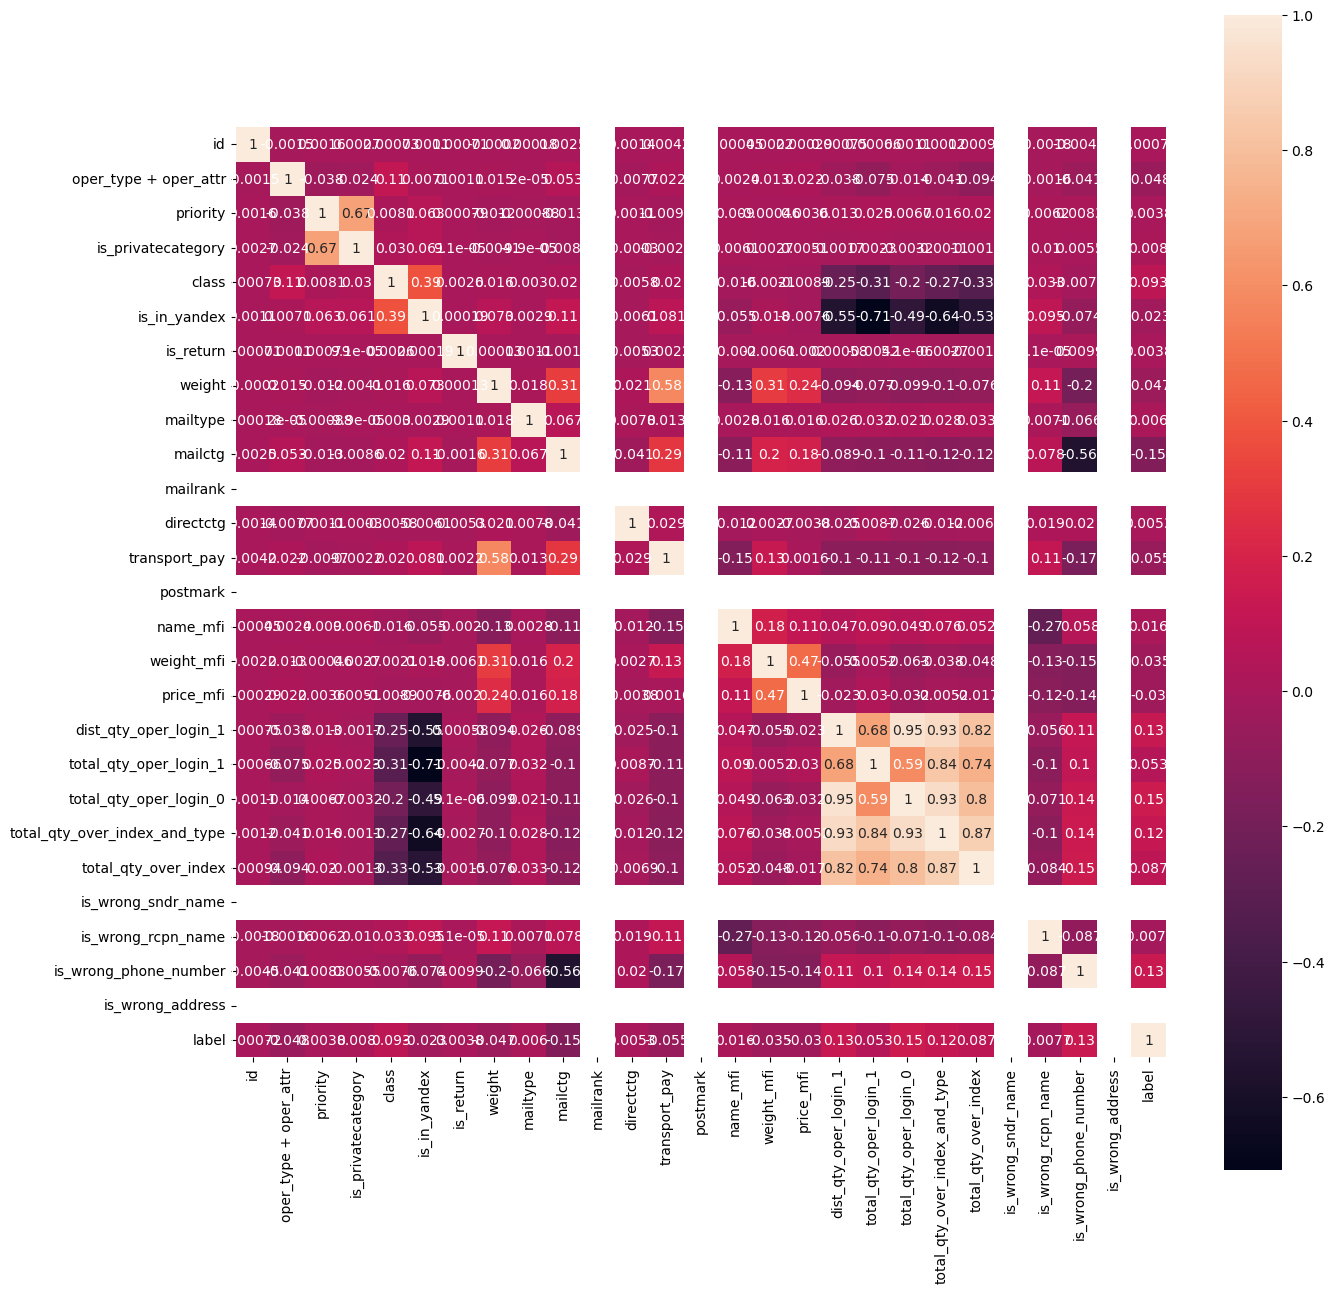

In [136]:
plt.rcParams['figure.figsize']=(15,15)


corr = df.iloc[:100000].corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [137]:
df.isna().any()

id                               False
oper_type + oper_attr            False
index_oper                       False
type                             False
priority                         False
is_privatecategory               False
class                            False
is_in_yandex                     False
is_return                        False
weight                           False
mailtype                         False
mailctg                          False
mailrank                         False
directctg                        False
transport_pay                    False
postmark                         False
name_mfi                         False
weight_mfi                       False
price_mfi                        False
dist_qty_oper_login_1            False
total_qty_oper_login_1           False
total_qty_oper_login_0           False
total_qty_over_index_and_type    False
total_qty_over_index             False
is_wrong_sndr_name               False
is_wrong_rcpn_name       

In [138]:
df['label']

0          0
1          0
2          0
3          0
4          0
          ..
5999995    0
5999996    0
5999997    0
5999998    0
5999999    0
Name: label, Length: 6000000, dtype: int64

In [139]:
np.unique(df['label'].to_numpy())

array([0, 1])

In [140]:
#df.isin([0]).any()

In [141]:
df = df.fillna(0)

In [142]:
len(df)

6000000

Обьединим список не нужных строк с списком строк типа object

In [143]:
col_obj = df.select_dtypes(include=['object']).columns.values
col_obj = list(set(col_obj) ^ set(["id", "label"]))

In [144]:
col_obj

['index_oper', 'label', 'id', 'type']

In [145]:
X = df.drop(col_obj, axis = 1)
y = df[["label"]]

In [146]:
from sklearn.preprocessing  import MinMaxScaler

In [147]:
X.head(5)

,oper_type + oper_attr,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,...,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address
0,26,7503.0,1,0.0,2,0,87.0,5.0,1.0,0.0,...,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0
1,20,7503.0,1,0.0,1,0,107.0,5.0,1.0,0.0,...,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0
2,15,7503.0,1,0.0,2,0,50.0,5.0,1.0,0.0,...,218.0,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0
3,16,7503.0,1,0.0,2,0,416.0,5.0,1.0,0.0,...,100.0,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0
4,17,7503.0,1,0.0,2,0,795.0,5.0,1.0,0.0,...,1000.0,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0


In [148]:
#m = X['price_mfi_div_weight_mfi'].to_numpy()
#m[np.isfinite(X['price_mfi_div_weight_mfi'])] = 0
#X['price_mfi_div_weight_mfi'] = m

In [149]:
X.columns

Index(['oper_type + oper_attr', 'priority', 'is_privatecategory', 'class',
       'is_in_yandex', 'is_return', 'weight', 'mailtype', 'mailctg',
       'mailrank', 'directctg', 'transport_pay', 'postmark', 'name_mfi',
       'weight_mfi', 'price_mfi', 'dist_qty_oper_login_1',
       'total_qty_oper_login_1', 'total_qty_oper_login_0',
       'total_qty_over_index_and_type', 'total_qty_over_index',
       'is_wrong_sndr_name', 'is_wrong_rcpn_name', 'is_wrong_phone_number',
       'is_wrong_address'],
      dtype='object')

In [150]:
X['price_mfi_div_weight'] = X['price_mfi'] / X['weight']

In [151]:
#X['price_mfi_div_weight_mfi'] = X['price_mfi'] / X['weight_mfi']

In [152]:
m = X.loc[X['price_mfi_div_weight'] != np.inf, 'price_mfi_div_weight'].max()
X['price_mfi_div_weight'].replace(np.inf,m,inplace=True)

In [153]:
#m = X.loc[X['price_mfi_div_weight_mfi'] != np.inf, 'price_mfi_div_weight_mfi'].max()
#X['price_mfi_div_weight_mfi'].replace(np.inf,m,inplace=True)

In [154]:
for col in X.columns:
    if col not in ['price_mfi_div_weight_mfi']:
        transformer = MinMaxScaler().fit(X[col].to_numpy().reshape(-1, 1))
        X[col] = transformer.transform(X[col].to_numpy().reshape(-1, 1))

In [155]:
X['price_mfi_div_weight']

0          0.001999
1          0.004335
2          0.005056
3          0.000279
4          0.001459
             ...   
5999995    0.004639
5999996    0.025597
5999997    0.009007
5999998    0.000000
5999999    0.011314
Name: price_mfi_div_weight, Length: 6000000, dtype: float64

In [156]:
X

,oper_type + oper_attr,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,price_mfi_div_weight
0,0.240741,0.9996,0.5,0.0,1.0,0.0,0.054683,1.0,1.0,0.0,...,0.036778,0.008068,0.000506,0.004312,0.037917,0.0,0.0,0.0,0.0,0.001999
1,0.185185,0.9996,0.5,0.0,0.5,0.0,0.067253,1.0,1.0,0.0,...,0.800350,0.547299,0.715598,0.731453,0.625716,0.0,0.0,0.0,0.0,0.004335
2,0.138889,0.9996,0.5,0.0,1.0,0.0,0.031427,1.0,1.0,0.0,...,0.054291,0.036365,0.027768,0.035856,0.241049,0.0,1.0,0.0,0.0,0.005056
3,0.148148,0.9996,0.5,0.0,1.0,0.0,0.261471,1.0,1.0,0.0,...,0.048161,0.023087,0.005611,0.015020,0.089464,0.0,0.0,0.0,0.0,0.000279
4,0.157407,0.9996,0.5,0.0,1.0,0.0,0.499686,1.0,1.0,0.0,...,0.014011,0.003550,0.000240,0.001908,0.021582,0.0,0.0,0.0,0.0,0.001459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,0.175926,0.9996,0.5,0.0,0.5,0.0,0.015713,1.0,0.5,0.0,...,0.953590,0.719962,1.000000,1.000000,0.861643,0.0,0.0,1.0,0.0,0.004639
5999996,0.175926,0.9996,0.5,0.0,1.0,0.0,0.052168,1.0,1.0,0.0,...,0.027145,0.019798,0.001237,0.010578,0.071261,0.0,0.0,0.0,0.0,0.025597
5999997,0.222222,1.0000,0.5,0.0,0.5,0.0,0.064739,1.0,1.0,0.0,...,0.162872,0.678999,0.000091,0.335490,0.345706,0.0,0.0,0.0,0.0,0.009007
5999998,0.138889,1.0000,0.5,0.0,0.5,0.0,0.169076,1.0,1.0,0.0,...,0.091944,0.169055,0.042706,0.111032,0.182879,0.0,1.0,0.0,0.0,0.000000


In [157]:
X['price_mfi_div_weight']

0          0.001999
1          0.004335
2          0.005056
3          0.000279
4          0.001459
             ...   
5999995    0.004639
5999996    0.025597
5999997    0.009007
5999998    0.000000
5999999    0.011314
Name: price_mfi_div_weight, Length: 6000000, dtype: float64

In [158]:
X = X.fillna(0)

In [159]:
np.isnan(X).any()

oper_type + oper_attr            False
priority                         False
is_privatecategory               False
class                            False
is_in_yandex                     False
is_return                        False
weight                           False
mailtype                         False
mailctg                          False
mailrank                         False
directctg                        False
transport_pay                    False
postmark                         False
name_mfi                         False
weight_mfi                       False
price_mfi                        False
dist_qty_oper_login_1            False
total_qty_oper_login_1           False
total_qty_oper_login_0           False
total_qty_over_index_and_type    False
total_qty_over_index             False
is_wrong_sndr_name               False
is_wrong_rcpn_name               False
is_wrong_phone_number            False
is_wrong_address                 False
price_mfi_div_weight     

In [160]:
#X = X.drop(['is_privatecategory',], axis = 1)

In [161]:
#X = X.drop(['is_return',], axis = 1)

In [162]:
#X = X.drop(['mailtype',], axis = 1)

In [163]:
#X = X.drop(['mailrank',], axis = 1)

In [164]:
#X = X.drop(['directctg',], axis = 1)

In [165]:
#X = X.drop(['postmark',], axis = 1)

In [166]:
#X = X.drop(['is_wrong_sndr_name',], axis = 1)

In [167]:
#X = X.drop(['is_wrong_address',], axis = 1)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Обучение модели

In [169]:
from sklearn import metrics

In [170]:
from catboost import CatBoostClassifier


booster = CatBoostClassifier(iterations=1000, verbose=5, task_type="GPU", devices='0:1')

booster.fit(X_train, y_train, eval_set=(X_test, y_test))

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("accuracy score:{:.6f}".format(metrics.recall_score(y_train, train_preds, average="macro", zero_division=0)))
print("accuracy score:{:.6f}".format(metrics.recall_score(y_test, test_preds, average="macro", zero_division=0)))

Learning rate set to 0.034298
0:	learn: 0.5609618	test: 0.5610413	best: 0.5610413 (0)	total: 32.9ms	remaining: 32.8s
5:	learn: 0.2656706	test: 0.2658839	best: 0.2658839 (5)	total: 188ms	remaining: 31.1s
10:	learn: 0.1430365	test: 0.1432752	best: 0.1432752 (10)	total: 339ms	remaining: 30.5s
15:	learn: 0.0959690	test: 0.0962100	best: 0.0962100 (15)	total: 491ms	remaining: 30.2s
20:	learn: 0.0743698	test: 0.0746140	best: 0.0746140 (20)	total: 640ms	remaining: 29.8s
25:	learn: 0.0603508	test: 0.0605784	best: 0.0605784 (25)	total: 788ms	remaining: 29.5s
30:	learn: 0.0554861	test: 0.0557103	best: 0.0557103 (30)	total: 935ms	remaining: 29.2s
35:	learn: 0.0530021	test: 0.0532357	best: 0.0532357 (35)	total: 1.08s	remaining: 29s
40:	learn: 0.0506877	test: 0.0509252	best: 0.0509252 (40)	total: 1.23s	remaining: 28.9s
45:	learn: 0.0494400	test: 0.0496762	best: 0.0496762 (45)	total: 1.38s	remaining: 28.7s
50:	learn: 0.0482689	test: 0.0484972	best: 0.0484972 (50)	total: 1.53s	remaining: 28.5s
55:	lea

460:	learn: 0.0393594	test: 0.0397180	best: 0.0397180 (460)	total: 13.7s	remaining: 16.1s
465:	learn: 0.0393513	test: 0.0397112	best: 0.0397112 (465)	total: 13.9s	remaining: 15.9s
470:	learn: 0.0393421	test: 0.0397029	best: 0.0397029 (470)	total: 14s	remaining: 15.8s
475:	learn: 0.0393346	test: 0.0396958	best: 0.0396958 (475)	total: 14.2s	remaining: 15.6s
480:	learn: 0.0393204	test: 0.0396821	best: 0.0396821 (480)	total: 14.3s	remaining: 15.5s
485:	learn: 0.0393146	test: 0.0396768	best: 0.0396768 (485)	total: 14.5s	remaining: 15.3s
490:	learn: 0.0393073	test: 0.0396707	best: 0.0396707 (490)	total: 14.6s	remaining: 15.2s
495:	learn: 0.0392934	test: 0.0396578	best: 0.0396578 (495)	total: 14.8s	remaining: 15s
500:	learn: 0.0392774	test: 0.0396418	best: 0.0396418 (500)	total: 14.9s	remaining: 14.9s
505:	learn: 0.0392652	test: 0.0396301	best: 0.0396301 (505)	total: 15.1s	remaining: 14.7s
510:	learn: 0.0392511	test: 0.0396174	best: 0.0396174 (510)	total: 15.2s	remaining: 14.6s
515:	learn: 0.

920:	learn: 0.0386015	test: 0.0390303	best: 0.0390303 (920)	total: 27.3s	remaining: 2.34s
925:	learn: 0.0385922	test: 0.0390211	best: 0.0390211 (925)	total: 27.5s	remaining: 2.2s
930:	learn: 0.0385895	test: 0.0390191	best: 0.0390191 (930)	total: 27.6s	remaining: 2.05s
935:	learn: 0.0385776	test: 0.0390067	best: 0.0390067 (935)	total: 27.8s	remaining: 1.9s
940:	learn: 0.0385689	test: 0.0389990	best: 0.0389990 (940)	total: 27.9s	remaining: 1.75s
945:	learn: 0.0385595	test: 0.0389900	best: 0.0389900 (945)	total: 28.1s	remaining: 1.6s
950:	learn: 0.0385535	test: 0.0389852	best: 0.0389852 (950)	total: 28.2s	remaining: 1.45s
955:	learn: 0.0385490	test: 0.0389814	best: 0.0389814 (955)	total: 28.4s	remaining: 1.3s
960:	learn: 0.0385461	test: 0.0389803	best: 0.0389803 (960)	total: 28.5s	remaining: 1.16s
965:	learn: 0.0385427	test: 0.0389779	best: 0.0389779 (965)	total: 28.7s	remaining: 1.01s
970:	learn: 0.0385396	test: 0.0389764	best: 0.0389764 (970)	total: 28.8s	remaining: 861ms
975:	learn: 0.

In [159]:
clf = RandomForestClassifier(random_state=0)

In [160]:
clf.fit(X_train, y_train)

/tmp/ipykernel_6914/2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

## Оценка точности

In [161]:
clf.feature_names_in_

array(['oper_type + oper_attr', 'priority', 'is_privatecategory', 'class',
       'is_in_yandex', 'is_return', 'weight', 'mailtype', 'mailctg',
       'mailrank', 'directctg', 'transport_pay', 'postmark', 'name_mfi',
       'weight_mfi', 'price_mfi', 'dist_qty_oper_login_1',
       'total_qty_oper_login_1', 'total_qty_oper_login_0',
       'total_qty_over_index_and_type', 'total_qty_over_index',
       'is_wrong_sndr_name', 'is_wrong_rcpn_name',
       'is_wrong_phone_number', 'is_wrong_address',
       'price_mfi_div_weight', 'price_mfi_div_weight_mfi'], dtype=object)

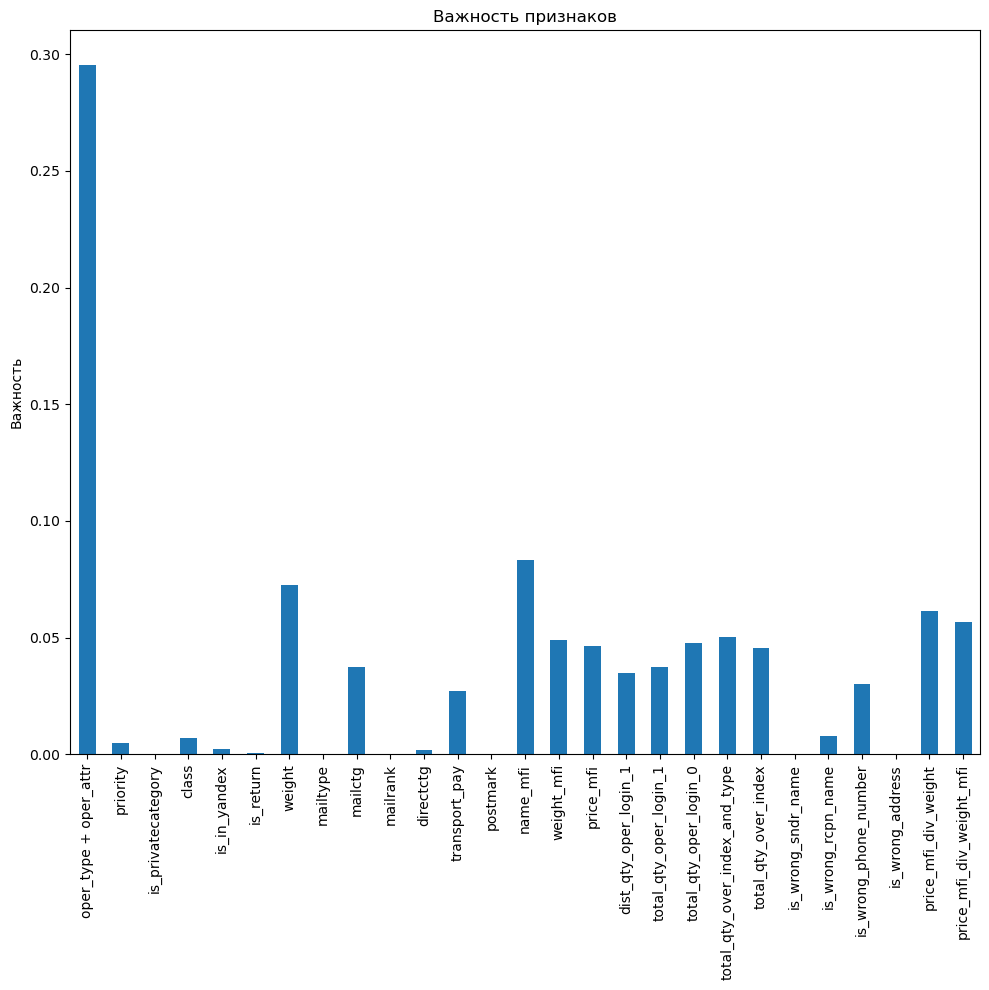

In [162]:
skl_iris_imp = pd.Series(clf.feature_importances_, clf.feature_names_in_)

fig, ax = plt.subplots(figsize=(10,10))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

In [163]:
pred = clf.predict(X_test)

In [164]:
score = recall_score(y_test, pred, average="macro")

In [165]:
print("Recall", score)

Recall 0.7890387333037784


## Предсказание

In [171]:
df_test = pd.read_csv("test_dataset_test.csv", error_bad_lines=False, index_col=False, dtype='unicode')

/tmp/ipykernel_7612/3058659259.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_test = pd.read_csv("test_dataset_test.csv", error_bad_lines=False, index_col=False, dtype='unicode')


In [172]:
len(df_test)

4000000

In [173]:
df_test.columns

Index(['id', 'oper_type + oper_attr', 'index_oper', 'type', 'priority',
       'is_privatecategory', 'class', 'is_in_yandex', 'is_return', 'weight',
       'mailtype', 'mailctg', 'mailrank', 'directctg', 'transport_pay',
       'postmark', 'name_mfi', 'weight_mfi', 'price_mfi',
       'dist_qty_oper_login_1', 'total_qty_oper_login_1',
       'total_qty_oper_login_0', 'total_qty_over_index_and_type',
       'total_qty_over_index', 'is_wrong_sndr_name', 'is_wrong_rcpn_name',
       'is_wrong_phone_number', 'is_wrong_address'],
      dtype='object')

In [174]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 28 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   id                             object
 1   oper_type + oper_attr          object
 2   index_oper                     object
 3   type                           object
 4   priority                       object
 5   is_privatecategory             object
 6   class                          object
 7   is_in_yandex                   object
 8   is_return                      object
 9   weight                         object
 10  mailtype                       object
 11  mailctg                        object
 12  mailrank                       object
 13  directctg                      object
 14  transport_pay                  object
 15  postmark                       object
 16  name_mfi                       object
 17  weight_mfi                     object
 18  price_mfi             

In [175]:
le = preprocessing.LabelEncoder()
le.fit(np.unique(df_test['name_mfi']))
df_test['name_mfi'] = le.transform(df_test['name_mfi'].to_numpy())
le = preprocessing.LabelEncoder()
le.fit(np.unique(df_test['is_privatecategory']))
df_test['is_privatecategory'] = le.transform(df_test['is_privatecategory'].to_numpy())
le = preprocessing.LabelEncoder()
le.fit(np.unique(df_test['oper_type + oper_attr']))
df_test['oper_type + oper_attr'] = le.transform(df_test['oper_type + oper_attr'].to_numpy())

In [176]:
df_test["is_in_yandex"] = pd.Categorical(df_test["is_in_yandex"])
df_test["is_in_yandex"].astype('category').cat.codes
df_test["is_in_yandex"] = df_test["is_in_yandex"].cat.codes

In [177]:
df_test["is_return"] = pd.Categorical(df_test["is_return"])
df_test["is_return"].astype('category').cat.codes
df_test["is_return"] = df_test["is_return"].cat.codes

In [178]:
cols_type = {}
for y in df.columns:
    if(df[y].dtype == np.float64 or df[y].dtype == np.int64):
        cols_type[y] = df[y].dtype

In [179]:
for col in cols_type.keys():
    if col not in ['label']:
        df_test[col] = df_test[col].astype(cols_type[col])

In [180]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 28 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          int64  
 2   index_oper                     object 
 3   type                           object 
 4   priority                       float64
 5   is_privatecategory             int64  
 6   class                          float64
 7   is_in_yandex                   int8   
 8   is_return                      int8   
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  name_mfi                       int64  
 17  weight_mfi                     float64
 18  pr

In [181]:
cols_numeric = []

for y in df_test.columns:
    if(df_test[y].dtype == np.float64 or df_test[y].dtype == np.int64) and y not in ['id', 'label']:
        print(y)
        data = df_test[y]
        threshold = 3
        mean = np.mean(data)
        std = np.std(data)
        
        outlier = []
        outlier_idx = []
        inlier = []
        print(mean, std)
        if std != 0:
            for idx, i in enumerate(data):
                z = (i-mean)/std
                if z > threshold:
                    outlier.append(i)
                    outlier_idx.append(idx)
                else:
                    inlier.append(i)

            col = df_test[y].to_numpy()
            col[outlier_idx] = np.median(inlier)
            df_test[y] = col

oper_type + oper_attr
34.811563 30.38632511519011
priority
7499.9897475 171.60991172708103
is_privatecategory
1.00003 0.029664778778087725
class
0.3570955 0.9855167700050839
weight
239.97529175 396.7059981638266
mailtype
4.99510975 0.15547615719015476
mailctg
0.77316 0.4403369328235513
mailrank
0.0 0.0
directctg
1.98840425 0.10730465312615774
transport_pay
11.879842020001538 22.243478571153908
postmark
0.097055 7.640902913351259
name_mfi
87570.48227025 64371.61674804179
weight_mfi
123.717895 209.34808481439157
price_mfi
455.6007785 2115.3333691385687
dist_qty_oper_login_1
318.93554575 401.1987214566053
total_qty_oper_login_1
27736626.4635755 29036573.233077895
total_qty_oper_login_0
28973714.50365625 53339224.31080048
total_qty_over_index_and_type
56710340.96723175 72903725.1869319
total_qty_over_index
71771465.16656475 75095898.4710231
is_wrong_sndr_name
0.00258275 0.050755092381393155
is_wrong_rcpn_name
0.25979575 0.4385224262123391
is_wrong_phone_number
0.17074475 0.3762857695271797

In [182]:
df_test = df_test.fillna(0)

In [183]:
df_test['price_mfi_div_weight'] = df_test['price_mfi'] / df_test['weight']

In [184]:
m = df_test.loc[df_test['price_mfi_div_weight'] != np.inf, 'price_mfi_div_weight'].max()
df_test['price_mfi_div_weight'].replace(np.inf,m,inplace=True)

In [185]:
#df_test['price_mfi_div_weight_mfi'] = df_test['price_mfi'] / df_test['weight_mfi']
#m = df_test.loc[df_test['price_mfi_div_weight_mfi'] != np.inf, 'price_mfi_div_weight_mfi'].max()
#df_test['price_mfi_div_weight_mfi'].replace(np.inf,m,inplace=True)

In [186]:
df_test = df_test.fillna(0)

In [187]:
for col in df_test.columns:
    if col not in ['price_mfi_div_weight_mfi', 'index_oper', 'type', 'id']:
        print(col)
        transformer = MinMaxScaler().fit(df_test[col].to_numpy().reshape(-1, 1))
        df_test[col] = transformer.transform(df_test[col].to_numpy().reshape(-1, 1))

oper_type + oper_attr
priority
is_privatecategory
class
is_in_yandex
is_return
weight
mailtype
mailctg
mailrank
directctg
transport_pay
postmark
name_mfi
weight_mfi
price_mfi
dist_qty_oper_login_1
total_qty_oper_login_1
total_qty_oper_login_0
total_qty_over_index_and_type
total_qty_over_index
is_wrong_sndr_name
is_wrong_rcpn_name
is_wrong_phone_number
is_wrong_address
price_mfi_div_weight


In [188]:
#col_obj = df_test.select_dtypes(include=['object']).columns.values
#col_obj = list(set(col_obj) ^ set(["id"]))

In [189]:
col_obj = [e for e in col_obj if e != 'label']

In [190]:
X_test_pred = df_test.drop([e for e in col_obj if e not in ['label', 'id']], axis = 1)

In [191]:
pred = booster.predict(X_test_pred)

In [115]:
len(list(zip(df_test['id'].to_numpy(), pred)))

4000000

In [116]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [194]:
import pandas as pd

pd.DataFrame(data=list(zip(df_test['id'].to_numpy(), pred)), columns=['id', 'label']).set_index('id').to_csv('submit.csv', sep=',', encoding='utf-8')

In [192]:
arr_states = {
    
}

for y in X.columns:
    if(X[y].dtype == np.float64 or X[y].dtype == np.int64) and y not in ['id', 'label']:
        print(y)
        data = X[y]
        data_test = df_test[y]
        threshold = 3
        mean = np.mean(data)
        std = np.std(data)
        mean_test = np.mean(data_test)
        std_test = np.std(data_test)
        mean_ = 0 if mean == 0 else mean_test/mean
        std_ = 0 if std == 0 else std_test/std
        arr_states[y] = {'mean': (1 - mean_)*100, 'std':(1-std_)*100}

oper_type + oper_attr
priority
is_privatecategory
class
is_in_yandex
is_return
weight
mailtype
mailctg
mailrank
directctg
transport_pay
postmark
name_mfi
weight_mfi
price_mfi
dist_qty_oper_login_1
total_qty_oper_login_1
total_qty_oper_login_0
total_qty_over_index_and_type
total_qty_over_index
is_wrong_sndr_name
is_wrong_rcpn_name
is_wrong_phone_number
is_wrong_address
price_mfi_div_weight


In [193]:
arr_states

{'oper_type + oper_attr': {'mean': -3.0240486730332528,
  'std': -0.04792277585063953},
 'priority': {'mean': -0.002206346941591164, 'std': 2.044478147981621},
 'is_privatecategory': {'mean': -99.91046869604287,
  'std': -36.450829823984286},
 'class': {'mean': -0.22213334270217988, 'std': -0.11084681452477874},
 'is_in_yandex': {'mean': -0.016042900309032326,
  'std': -0.0008839470402532967},
 'is_return': {'mean': 2.1122726621795707, 'std': 1.0605556085203305},
 'weight': {'mean': -6.8786477532876145, 'std': -3.7229827522151426},
 'mailtype': {'mean': -0.0011895533760686305, 'std': 0.5657579495060516},
 'mailctg': {'mean': -0.026883267380473086, 'std': 0.1023431120243945},
 'mailrank': {'mean': 100, 'std': 100},
 'directctg': {'mean': -0.0008088628570046552, 'std': 0.06237160748859827},
 'transport_pay': {'mean': -0.028930741439170404, 'std': -0.070298610945696},
 'postmark': {'mean': 1.0638297872340385, 'std': 1.0214770758771752},
 'name_mfi': {'mean': -0.010979743921146756, 'std': 